# Real-world data

The section reports the performances that are obtained on real-world data using imbalanced learning techniques. The dataset is the same as in [Chapter 3, Section 5](Baseline_FDS_RealWorldData). Results are reported following the methodology used in the previous sections with simulated data. 

We first report the performances for cost-sensitive techniques, varying the class weight for decision trees and logistic regression models. We then report the performances for resampling techniques using decision trees, and varying the imbalance ratio with SMOTE, RUS, and a combination of SMOTE and RUS. We finally report the results using ensemble techniques, varying the imbalance ratio with Bagging and Random Forests models, and varying the class weight with an XGBoost model.


In [1]:
# Initialization: Load shared functions

# Load shared functions
!curl -O https://raw.githubusercontent.com/Fraud-Detection-Handbook/fraud-detection-handbook/main/Chapter_References/shared_functions.py
%run shared_functions.py
#%run ../Chapter_References/shared_functions.ipynb

## Cost-sensitive

We followed the methodology reported in Section 6.2 ([](Cost_Sensitive_Learning_Transaction_Data)), saving the results in a `performances_cost_sensitive_real_world_data.pkl` pickle file. The performances and execution times can be retrieved by loading the pickle file.

In [2]:
filehandler = open('images/performances_cost_sensitive_real_world_data.pkl', 'rb') 
(performances_df_dictionary, execution_times) = pickle.load(filehandler)

### Decision tree

The results for decision tree models are reported below. The tree depth was set to 6 (providing the best performances as reported in [Chapter 5](Model_Selection_RWD_Decision_Trees)). We varied the class weight in the range 0.01 to 1, with the following set of possible values: $[0.01, 0.05, 0.1, 0.5, 1]$.


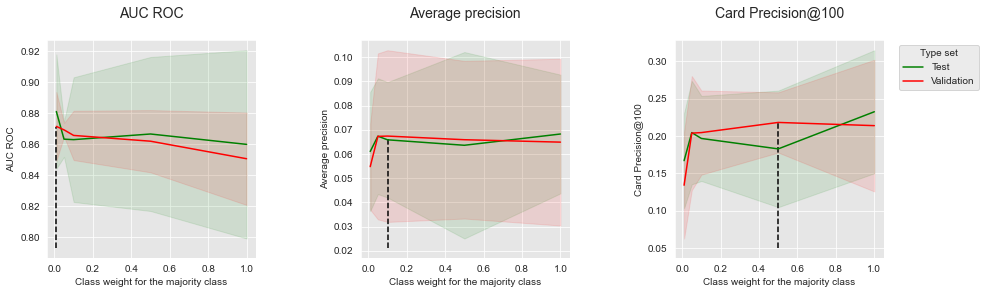

In [3]:
performances_df_dt=performances_df_dictionary['Decision Tree']
summary_performances_dt=get_summary_performances(performances_df_dt, parameter_column_name="Parameters summary")

get_performances_plots(performances_df_dt, 
                       performance_metrics_list=['AUC ROC', 'Average precision', 'Card Precision@100'], 
                       expe_type_list=['Test','Validation'], expe_type_color_list=['#008000','#FF0000'],
                       parameter_name="Class weight for the majority class",
                       summary_performances=summary_performances_dt)

We recall that a class weight of 1 consists in giving the same weight to positive and negative classes, whereas a class weight of 0.01 consists in giving 100 times more weight to the positive class (thus favoring the detection of fraud instances). We also note that a class weight of 1 provides the same results as in [Chapter 5](Model_Selection_Decision_Tree). 

The results show that decreasing the class weight allows to increase the performances in terms of AUC ROC, but decreases the performances in terms of Average Precision and CP@100, particularly for very low values (close to 0.01).

The performances as a function of the best parameters are summarized below.

In [4]:
summary_performances_dt

,AUC ROC,Average precision,Card Precision@100
Best estimated parameters,0.01,0.1,0.5
Validation performance,0.871+/-0.01,0.067+/-0.02,0.218+/-0.02
Test performance,0.881+/-0.02,0.066+/-0.01,0.183+/-0.04
Optimal parameter(s),0.01,1.0,1.0
Optimal test performance,0.881+/-0.02,0.068+/-0.01,0.232+/-0.04


These results follow the same trends as those obtained with the [simulated data](Cost_Sensitive_Learning_Transaction_Data): Cost-sensitive learning is effective for improving AUC ROC performances, but detrimental to Average Precision. 

### Logistic regression

The results for logistic regression are reported below. The regularization parameter C was set to 0.1 (providing the best performances as was reported in [Chapter 5](Model_Selection_RWD_Logistic_Regression)). 

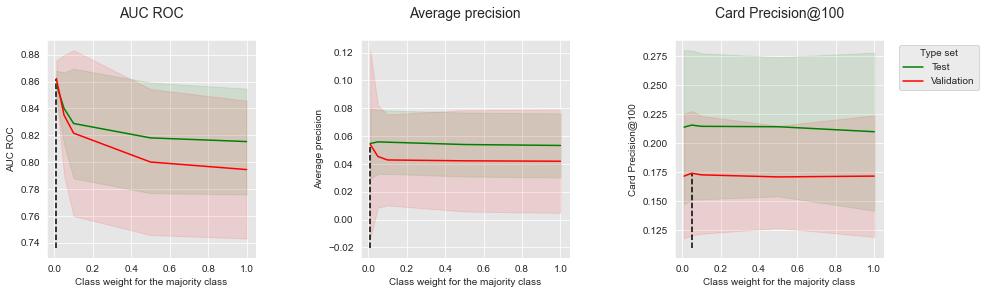

In [5]:
performances_df_lr=performances_df_dictionary['Logistic Regression']
summary_performances_lr=get_summary_performances(performances_df_lr, parameter_column_name="Parameters summary")

get_performances_plots(performances_df_lr, 
                       performance_metrics_list=['AUC ROC', 'Average precision', 'Card Precision@100'], 
                       expe_type_list=['Test','Validation'], expe_type_color_list=['#008000','#FF0000'],
                       parameter_name="Class weight for the majority class",
                       summary_performances=summary_performances_lr)

In [6]:
summary_performances_lr

,AUC ROC,Average precision,Card Precision@100
Best estimated parameters,0.01,0.01,0.05
Validation performance,0.862+/-0.01,0.054+/-0.03,0.174+/-0.03
Test performance,0.858+/-0.01,0.055+/-0.01,0.216+/-0.03
Optimal parameter(s),0.01,0.05,0.05
Optimal test performance,0.858+/-0.01,0.056+/-0.01,0.216+/-0.03


Similar to decision trees, lowering the class weight of the majority class provides a boost of performances in terms of AUC ROC. The impact on Average Precision and CP@100 is however mitigated: the only noticeable impact is an improvement of the Average Precision on validation data, which however comes at the cost of a higher variance (as is visible from the large confidence interval).

## Resampling

We followed the methodology reported in Section 6.3 ([](Resampling_Strategies_Transaction_Data)), saving the results in the `performances_resampling_real_world_data.pkl` pickle file. The performances and execution times can be retrieved by loading the file. Performances were assessed for SMOTE, RUS, and a combined resampling with SMOTE and RUS. All the experiments relied on decision tree models, whose tree depth was set to 6 (providing the best performances as was reported in [Chapter 5](Model_Selection_RWD_Decision_Trees)). 


In [7]:
filehandler = open('images/performances_resampling_real_world_data.pkl', 'rb') 
(performances_df_dictionary, execution_times) = pickle.load(filehandler)

### SMOTE

The results for SMOTE are reported below. The imbalance ratio was varied in the range 0.01 to 1, with the following set of possible values: $[0.01, 0.05, 0.1, 0.5, 1]$. We recall that the higher the imbalance ratio, the stronger the resampling. An imbalance ratio of 0.01 yields a distribution close to the original one (where the percentage of frauds is close to 0.25%). An imbalance ratio of 1 yields a distribution that contains as many positive instances as negative instances.  


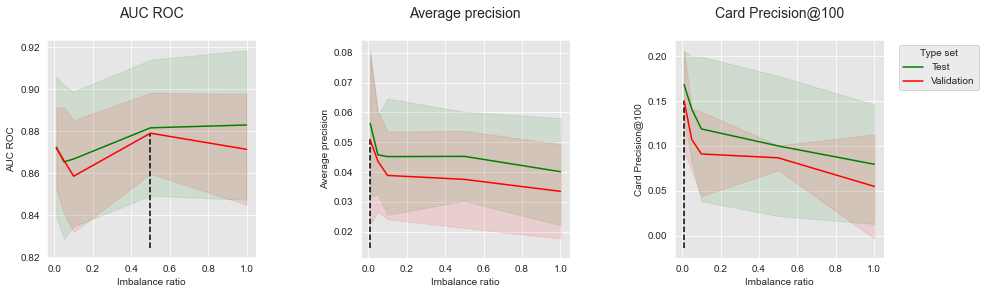

In [8]:
performances_df_SMOTE=performances_df_dictionary['SMOTE']
summary_performances_SMOTE=get_summary_performances(performances_df_SMOTE, parameter_column_name="Parameters summary")

get_performances_plots(performances_df_SMOTE, 
                       performance_metrics_list=['AUC ROC', 'Average precision', 'Card Precision@100'], 
                       expe_type_list=['Test','Validation'], expe_type_color_list=['#008000','#FF0000'],
                       parameter_name="Imbalance ratio",
                       summary_performances=summary_performances_SMOTE)

In [9]:
summary_performances_SMOTE

,AUC ROC,Average precision,Card Precision@100
Best estimated parameters,0.5,0.01,0.01
Validation performance,0.879+/-0.01,0.051+/-0.01,0.15+/-0.03
Test performance,0.882+/-0.02,0.056+/-0.01,0.168+/-0.02
Optimal parameter(s),1.0,0.01,0.01
Optimal test performance,0.883+/-0.02,0.056+/-0.01,0.168+/-0.02


The results show that the benefits of SMOTE are mitigated. Creating new synthetic instances of the positive class tends to increase AUC ROC performances (left plot). It however comes with a decrease of performances for both Average Precision and CP@100 metrics. These results are in line with those observed on simulated data (Section 6.3, [](Resampling_Strategies_Transaction_Data_Oversampling)).

### Random undersampling

The results for random undersampling (RUS) are reported below. 

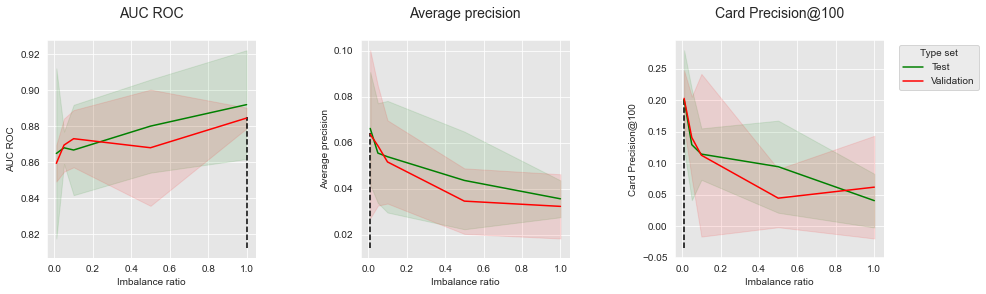

In [10]:
performances_df_RUS=performances_df_dictionary['RUS']
summary_performances_RUS=get_summary_performances(performances_df_RUS, parameter_column_name="Parameters summary")

get_performances_plots(performances_df_RUS, 
                       performance_metrics_list=['AUC ROC', 'Average precision', 'Card Precision@100'], 
                       expe_type_list=['Test','Validation'], expe_type_color_list=['#008000','#FF0000'],
                       parameter_name="Imbalance ratio",
                       summary_performances=summary_performances_RUS)

In [11]:
summary_performances_RUS

,AUC ROC,Average precision,Card Precision@100
Best estimated parameters,1.0,0.01,0.01
Validation performance,0.885+/-0.0,0.064+/-0.02,0.203+/-0.02
Test performance,0.892+/-0.02,0.066+/-0.01,0.201+/-0.04
Optimal parameter(s),1.0,0.01,0.01
Optimal test performance,0.892+/-0.02,0.066+/-0.01,0.201+/-0.04


Similarly, RUS allows to improve performances in terms of AUC ROC, but comes with a noticeable decrease of performances in terms of AP and CP@100. These results are also in line with those observed on simulated data (Section 6.3, [](Resampling_Strategies_Transaction_Data_RUS)).

### Combining SMOTE with undersampling

We finally report the results for combined resampling (SMOTE followed by RUS). 

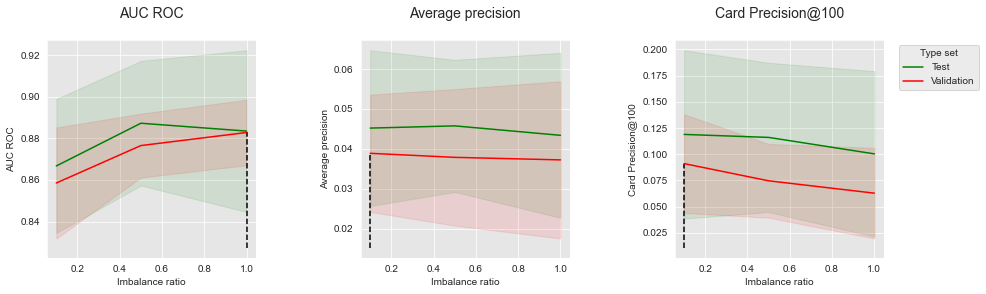

In [12]:
performances_df_combined=performances_df_dictionary['Combined']
summary_performances_combined=get_summary_performances(performances_df_combined, parameter_column_name="Parameters summary")

get_performances_plots(performances_df_combined, 
                       performance_metrics_list=['AUC ROC', 'Average precision', 'Card Precision@100'], 
                       expe_type_list=['Test','Validation'], expe_type_color_list=['#008000','#FF0000'],
                       parameter_name="Imbalance ratio",
                       summary_performances=summary_performances_combined)

In [13]:
summary_performances_combined

,AUC ROC,Average precision,Card Precision@100
Best estimated parameters,1.0,0.1,0.1
Validation performance,0.883+/-0.01,0.039+/-0.01,0.091+/-0.02
Test performance,0.883+/-0.02,0.045+/-0.01,0.119+/-0.04
Optimal parameter(s),0.5,0.5,0.1
Optimal test performance,0.887+/-0.01,0.046+/-0.01,0.119+/-0.04


Again, we observe that resampling allows to improve performances in terms of AUC ROC, but decreases performances in terms of AP and CP@100. The results are in line with those observed on simulated data (Section 6.3, [](Resampling_Strategies_Transaction_Data_Combining)).

## Ensembling

We followed the methodology reported in Section 6.4 ([](Ensembling_Strategies_Transaction_Data)), saving the results in a `performances_resampling_real_world_data.pkl` pickle file. The performances and execution times can be retrieved by loading the pickle file.


In [14]:
filehandler = open('images/performances_ensembles_real_world_data.pkl', 'rb') 
(performances_df_dictionary, execution_times) = pickle.load(filehandler)

Performances were assessed for balanced bagging, balanced random forest, and weighted XGBoost.

### Baseline

For the [baseline](Ensembling_Strategies_Transaction_Data_Baseline), the hyperparameters were chosen as follows:

* Bagging and random forest: 100 trees, with a maximum depth of 10. These were shown to provide the best performances for random forests in [Chapter 5, Model Selection - Random forest](Model_Selection_RWD_RF).
* XGBoost: 100 trees, with a maximum depth of 6, and a learning rate of 0.1. These were shown to provide the best trade-off in terms of performances in [Chapter 5, Model Selection - XGBoost](Model_Selection_RWD_XGBoost). 

The baseline performances are reported in the table below. It is worth noting that the performances for random forest and XGBoost are the same as those reported in [Chapter 5, Model Selection - Random forest](Model_Selection_RWD_RF) and [Chapter 5, Model Selection - XGBoost](Model_Selection_RWD_XGBoost), respectively.


In [15]:
performances_df_baseline_bagging=performances_df_dictionary['Baseline Bagging']
summary_performances_baseline_bagging=get_summary_performances(performances_df_baseline_bagging, parameter_column_name="Parameters summary")

performances_df_baseline_rf=performances_df_dictionary['Baseline RF']
summary_performances_baseline_rf=get_summary_performances(performances_df_baseline_rf, parameter_column_name="Parameters summary")

performances_df_baseline_xgboost=performances_df_dictionary['Baseline XGBoost']
summary_performances_baseline_xgboost=get_summary_performances(performances_df_baseline_xgboost, parameter_column_name="Parameters summary")

summary_test_performances = pd.concat([summary_performances_baseline_bagging.iloc[2,:],
                                       summary_performances_baseline_rf.iloc[2,:],
                                       summary_performances_baseline_xgboost.iloc[2,:],
                                      ],axis=1)
summary_test_performances.columns=['Baseline Bagging', 'Baseline RF', 'Baseline XGBoost']


In [16]:
summary_test_performances

,Baseline Bagging,Baseline RF,Baseline XGBoost
AUC ROC,0.912+/-0.02,0.912+/-0.02,0.928+/-0.01
Average precision,0.072+/-0.03,0.08+/-0.03,0.095+/-0.03
Card Precision@100,0.209+/-0.07,0.227+/-0.05,0.235+/-0.07


XGBoost was observed to provide better performances than random forest across all performance metrics, as was already reported in [](Model_Selection_RWD_Comparison). The performances of bagging were on par with random forest in terms of AUC ROC, but lower in terms of Average Precision and CP@100. 

### Balanced bagging

Similar to [](Ensembling_Strategies_Transaction_Data_Bagging) with simulated data, the imbalance ratio (`sampling_strategy` parameter) was parametrized to take values in the set $[0.01, 0.05, 0.1, 0.5, 1]$ for the model selection procedure. The number of trees and maximum tree depth were set to 100 and 10 (as with baseline bagging).

In [17]:
performances_df_balanced_bagging=performances_df_dictionary['Balanced Bagging']
performances_df_balanced_bagging

,AUC ROC Test,AUC ROC Test Std,Average precision Test,Average precision Test Std,Card Precision@100 Test,Card Precision@100 Test Std,Parameters,Execution time,AUC ROC Validation,AUC ROC Validation Std,Average precision Validation,Average precision Validation Std,Card Precision@100 Validation,Card Precision@100 Validation Std,Parameters summary
0,0.917228,0.017889,0.086163,0.022412,0.247857,0.041656,{'clf__base_estimator': DecisionTreeClassifier...,260.625890,0.913089,0.006379,0.094850,0.017160,0.258929,0.025140,0.02
1,0.918801,0.015721,0.090421,0.017192,0.247500,0.037422,{'clf__base_estimator': DecisionTreeClassifier...,289.001823,0.914338,0.006752,0.089633,0.017394,0.255000,0.037095,0.05
2,0.919477,0.013627,0.087215,0.016194,0.240000,0.039448,{'clf__base_estimator': DecisionTreeClassifier...,251.555288,0.914954,0.008718,0.085063,0.017055,0.241071,0.034998,0.10
3,0.921931,0.012261,0.076810,0.015141,0.209643,0.035962,{'clf__base_estimator': DecisionTreeClassifier...,238.826444,0.913580,0.012917,0.069417,0.010087,0.195714,0.013209,0.50
4,0.921426,0.013367,0.069408,0.011683,0.189286,0.023332,{'clf__base_estimator': DecisionTreeClassifier...,197.796464,0.914754,0.011732,0.060259,0.008555,0.160357,0.021556,1.00


Let us summarize the performances to highlight the optimal imbalance ratio, and plot the performances as a function of the imbalance ratio for the three performance metrics.

In [18]:
summary_performances_balanced_bagging=get_summary_performances(performances_df_balanced_bagging, parameter_column_name="Parameters summary")
summary_performances_balanced_bagging

,AUC ROC,Average precision,Card Precision@100
Best estimated parameters,0.1,0.02,0.02
Validation performance,0.915+/-0.01,0.095+/-0.02,0.259+/-0.03
Test performance,0.919+/-0.01,0.086+/-0.02,0.248+/-0.04
Optimal parameter(s),0.5,0.05,0.02
Optimal test performance,0.922+/-0.01,0.09+/-0.02,0.248+/-0.04


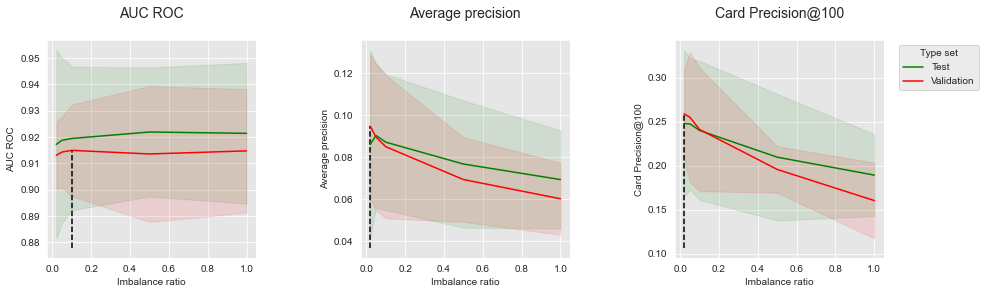

In [19]:
get_performances_plots(performances_df_balanced_bagging, 
                       performance_metrics_list=['AUC ROC', 'Average precision', 'Card Precision@100'], 
                       expe_type_list=['Test','Validation'], expe_type_color_list=['#008000','#FF0000'],
                       parameter_name="Imbalance ratio",
                       summary_performances=summary_performances_balanced_bagging)

The results show that increasing the imbalance ratio leads to a decrease of both Average Precision and CP@100. The trend is different with AUC ROC, where increasing the imbalance ratio first leads to a slight improvement of the metric, before reaching a plateau. It is worth noting that the results are qualitatively similar to [](Ensembling_Strategies_Transaction_Data_Bagging) with simulated data for AUC ROC and Average Precision. 

### Balanced random forest

Similar to [](Ensembling_Strategies_Transaction_Data_RF) with simulated data, the imbalance ratio (`sampling_strategy` parameter) was parametrized to take values in the set $[0.01, 0.05, 0.1, 0.5, 1]$ for the model selection procedure. The number of trees and maximum tree depth were set to 100 and 10 (as with baseline random forest).

In [20]:
performances_df_balanced_rf=performances_df_dictionary['Balanced RF']
performances_df_balanced_rf

,AUC ROC Test,AUC ROC Test Std,Average precision Test,Average precision Test Std,Card Precision@100 Test,Card Precision@100 Test Std,Parameters,Execution time,AUC ROC Validation,AUC ROC Validation Std,Average precision Validation,Average precision Validation Std,Card Precision@100 Validation,Card Precision@100 Validation Std,Parameters summary
0,0.918636,0.020386,0.093255,0.018644,0.253929,0.026733,"{'clf__max_depth': 10, 'clf__n_estimators': 10...",138.678571,0.918772,0.005630,0.099003,0.021238,0.263571,0.031274,0.01
1,0.922445,0.018733,0.092084,0.017847,0.245000,0.025425,"{'clf__max_depth': 10, 'clf__n_estimators': 10...",140.741641,0.920488,0.005681,0.094071,0.018980,0.255000,0.033480,0.05
2,0.925383,0.015810,0.088692,0.017844,0.238929,0.027244,"{'clf__max_depth': 10, 'clf__n_estimators': 10...",130.145606,0.921882,0.004630,0.091078,0.019971,0.247500,0.037490,0.10
3,0.926452,0.013919,0.075340,0.013228,0.200714,0.032490,"{'clf__max_depth': 10, 'clf__n_estimators': 10...",125.557530,0.921611,0.007349,0.074475,0.016815,0.202857,0.034949,0.50
4,0.924311,0.013693,0.069106,0.011243,0.176786,0.015498,"{'clf__max_depth': 10, 'clf__n_estimators': 10...",115.135572,0.919174,0.008283,0.066712,0.015405,0.180714,0.037109,1.00


Let us summarize the performances to highlight the optimal imbalance ratio, and plot the performances as a function of the imbalance ratio for the three performance metrics.

In [21]:
summary_performances_balanced_rf=get_summary_performances(performances_df_balanced_rf, parameter_column_name="Parameters summary")
summary_performances_balanced_rf


,AUC ROC,Average precision,Card Precision@100
Best estimated parameters,0.1,0.01,0.01
Validation performance,0.922+/-0.0,0.099+/-0.02,0.264+/-0.03
Test performance,0.925+/-0.02,0.093+/-0.02,0.254+/-0.03
Optimal parameter(s),0.5,0.01,0.01
Optimal test performance,0.926+/-0.01,0.093+/-0.02,0.254+/-0.03


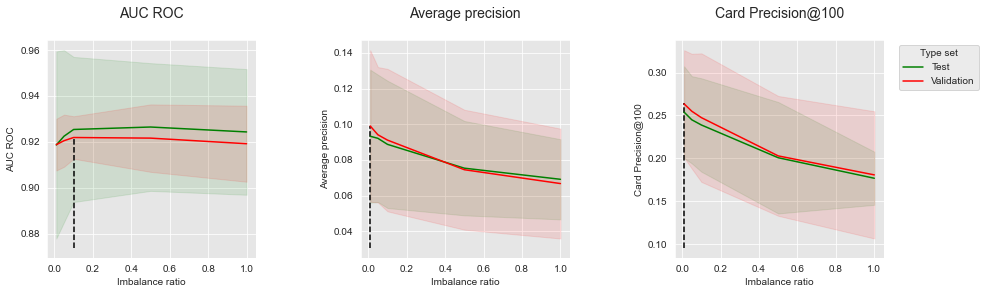

In [22]:
get_performances_plots(performances_df_balanced_rf, 
                       performance_metrics_list=['AUC ROC', 'Average precision', 'Card Precision@100'], 
                       expe_type_list=['Test','Validation'], expe_type_color_list=['#008000','#FF0000'],
                       parameter_name="Imbalance ratio",
                       summary_performances=summary_performances_balanced_rf)

The results follow the same trends as with balanced bagging: increasing the imbalance ratio is detrimental to Average Precision and CP@100, but can slightly increase AUC ROC. The results are qualitatively similar to [](Ensembling_Strategies_Transaction_Data_RF) with simulated data for AUC ROC and Average Precision.

### Weighted XGBoost

Finally, similar to [](Ensembling_Strategies_Transaction_Data_Weighted_XGBoost) with simulated data, we varied the `scale_pos_weight` parameter to take values in the set $[1,5,10,50,100]$. The same hyperparameters as the baseline XGBoost were otherwise kept (100 trees with a maximum depth of 6, and a learning rate of 0.1).


In [23]:
performances_df_weighted_xgboost=performances_df_dictionary['Weighted XGBoost']
performances_df_weighted_xgboost


,AUC ROC Test,AUC ROC Test Std,Average precision Test,Average precision Test Std,Card Precision@100 Test,Card Precision@100 Test Std,Parameters,Execution time,AUC ROC Validation,AUC ROC Validation Std,Average precision Validation,Average precision Validation Std,Card Precision@100 Validation,Card Precision@100 Validation Std,Parameters summary
0,0.928408,0.014108,0.094781,0.030425,0.235357,0.068111,"{'clf__learning_rate': 0.1, 'clf__max_depth': ...",518.837213,0.924261,0.011350,0.102488,0.019552,0.260714,0.023765,1
1,0.927328,0.013481,0.096711,0.025309,0.248929,0.056887,"{'clf__learning_rate': 0.1, 'clf__max_depth': ...",626.773925,0.920673,0.016914,0.106036,0.021723,0.268571,0.021213,5
2,0.926817,0.013696,0.093330,0.026236,0.231071,0.057821,"{'clf__learning_rate': 0.1, 'clf__max_depth': ...",639.092060,0.920256,0.015958,0.098559,0.019405,0.262143,0.021888,10
3,0.925220,0.012177,0.095823,0.024201,0.240000,0.041367,"{'clf__learning_rate': 0.1, 'clf__max_depth': ...",627.310905,0.912374,0.027515,0.093519,0.014645,0.244643,0.032739,50
4,0.924530,0.012777,0.089102,0.030194,0.237857,0.043910,"{'clf__learning_rate': 0.1, 'clf__max_depth': ...",480.403027,0.912332,0.023152,0.086822,0.013398,0.238929,0.039453,100


Let us summarize the performances to highlight the optimal imbalance ratio, and plot the performances as a function of the class weight for the three performance metrics.

In [24]:
summary_performances_weighted_xgboost=get_summary_performances(performances_df_weighted_xgboost, parameter_column_name="Parameters summary")
summary_performances_weighted_xgboost


,AUC ROC,Average precision,Card Precision@100
Best estimated parameters,1,5,5
Validation performance,0.924+/-0.01,0.106+/-0.02,0.269+/-0.02
Test performance,0.928+/-0.01,0.097+/-0.03,0.249+/-0.06
Optimal parameter(s),1,5,5
Optimal test performance,0.928+/-0.01,0.097+/-0.03,0.249+/-0.06


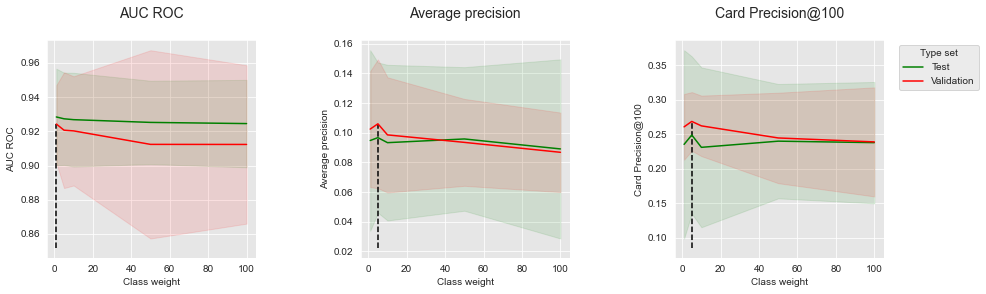

In [25]:
get_performances_plots(performances_df_weighted_xgboost, 
                       performance_metrics_list=['AUC ROC', 'Average precision', 'Card Precision@100'], 
                       expe_type_list=['Test','Validation'], expe_type_color_list=['#008000','#FF0000'],
                       parameter_name="Class weight",
                       summary_performances=summary_performances_weighted_xgboost)

Contrary to balanced bagging and balanced random forest, increasing the class weight of the minority class allows to slightly improve the performances in terms of Average Precision and CP@100. Improvements are only observed for a slight increase of the class weight (from 1 to 5). Higher values lead to slight decreases of performances. For AUC ROC, the optimal class weight is found to be 1 (equal cost for the minority and majority classes). 

### Summary

Let us finally summarize in a single table the results on the real-world dataset. Performance metrics are reported row-wise, while ensemble methods are reported column-wise. 

In [26]:
summary_test_performances = pd.concat([summary_performances_baseline_bagging.iloc[2,:],
                                       summary_performances_balanced_bagging.iloc[2,:],
                                       summary_performances_baseline_rf.iloc[2,:],
                                       summary_performances_balanced_rf.iloc[2,:],
                                       summary_performances_baseline_xgboost.iloc[2,:],
                                       summary_performances_weighted_xgboost.iloc[2,:],
                                      ],axis=1)
summary_test_performances.columns=['Baseline Bagging', 'Balanced Bagging', 
                                   'Baseline RF', 'Balanced RF', 
                                   'Baseline XGBoost', 'Weighted XGBoost']


In [27]:
summary_test_performances

,Baseline Bagging,Balanced Bagging,Baseline RF,Balanced RF,Baseline XGBoost,Weighted XGBoost
AUC ROC,0.912+/-0.02,0.919+/-0.01,0.912+/-0.02,0.925+/-0.02,0.928+/-0.01,0.928+/-0.01
Average precision,0.072+/-0.03,0.086+/-0.02,0.08+/-0.03,0.093+/-0.02,0.095+/-0.03,0.097+/-0.03
Card Precision@100,0.209+/-0.07,0.248+/-0.04,0.227+/-0.05,0.254+/-0.03,0.235+/-0.07,0.249+/-0.06


The best improvements were observed for balanced bagging and balanced random forest, for which better performances were obtained compared to baseline bagging and baseline random forest. However, as we noted for the [simulated data](Ensembling_Strategies_Transaction_Data), the benefits of resampling are most likely due to a higher diversity of the trees making up the ensembles, leading to a decrease of the overfitting phenomenon. In particular, the optimum imbalance ratio for Average Precision and CP@100 was found to be the lowest one (0.01), which shows that the best strategy for these metrics was to avoid rebalancing the training sets.

On the contrary, we observed that rebalancing the training sets could slightly improve the performances in terms of AUC ROC. The improvements were observed for imbalance ratios ranging from 0.1 to 0.5, leading to a slight increase of around 1% of the AUC ROC (from 0.91 to 0.92). Besides allowing a slight increase in performances, it is worth noting that rebalancing the dataset with undersampling techniques could speed up computation times by up to 20%.

As for the results obtained on [simulated data](Ensembling_Strategies_Transaction_Data_Summary), these experiments suggest that rebalancing can help improve performances in terms of AUC ROC or speed up the training time of an ensemble. It however appeared that keeping all of the training data was the best strategy if Average Precision and CP@100 are the performance metrics to optimize.

Overall, the best performances were obtained with XGBoost for the three metrics. As for the [simulated data](Ensembling_Strategies_Transaction_Data_Summary), modifying the class weight through weighted XGBoost did not allow to significantly improve performances, illustrating the robustness of XGBoost in class imbalance scenarios.